In [4]:
#un comment the following lines to use sci-kit tips on the exercise (ie, shortcuts need to be taken):
#https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_label.html#sphx-glr-auto-examples-segmentation-plot-label-py

#from skimage import data
#from skimage.filters import threshold_otsu
#from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, watershed, disk
from skimage.feature import peak_local_max
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from skimage.filters import rank


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
import modules.oiplib as ip
import math

from scipy import ndimage as ndi

%matplotlib inline

#This line is specific for mac users with retina display
%config InlineBackend.figure_format = 'retina'

#from ipywidgets import interact, interactive, fixed, interact_manual
#from ipywidgets import widgets



(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11c686350>)

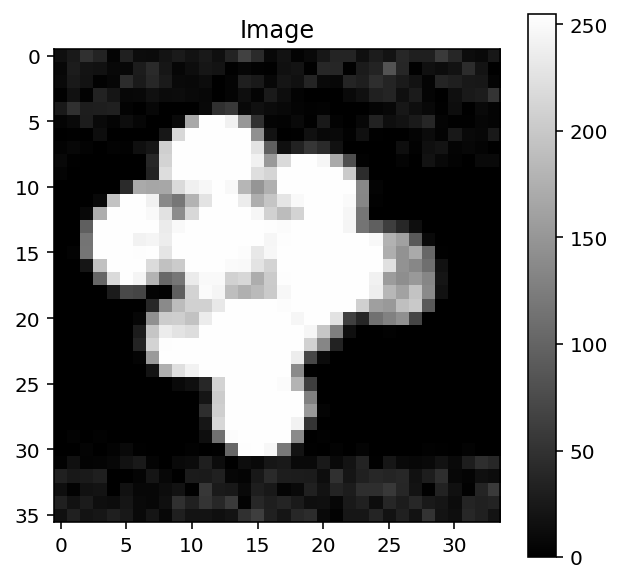

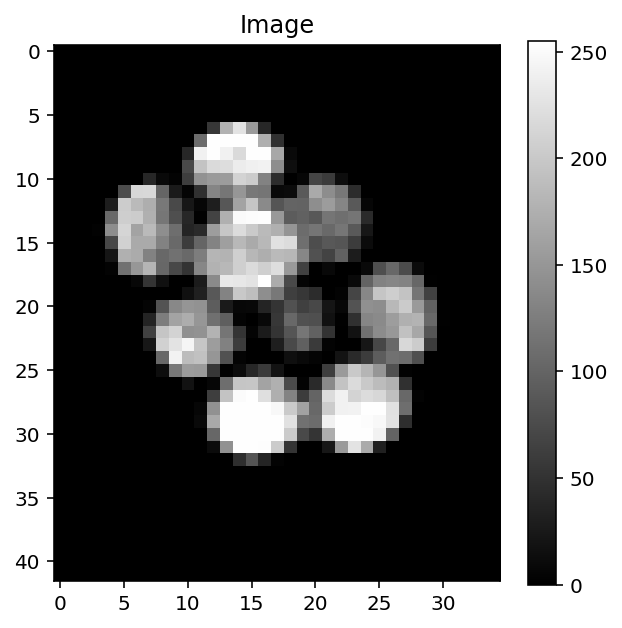

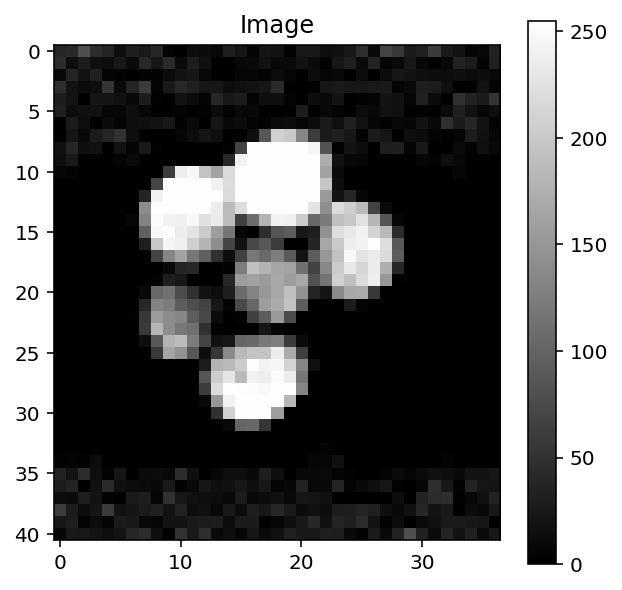

In [34]:
imgurl = '../images/cluster1.png'
imgurl2 = '../images/cluster2.png'
imgurl3 = '../images/cluster3.png'
img = ip.loadImage(imgurl)
img = ip.rgb2GrayLuminosity(img)
img2 = ip.loadImage(imgurl2)
img2 = ip.rgb2GrayLuminosity(img2)
img3 = ip.loadImage(imgurl3)
img3 = ip.rgb2GrayLuminosity(img3)
ip.showImage(img3)
ip.showImage(img2)
ip.showImage(img)

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11a47f650>)

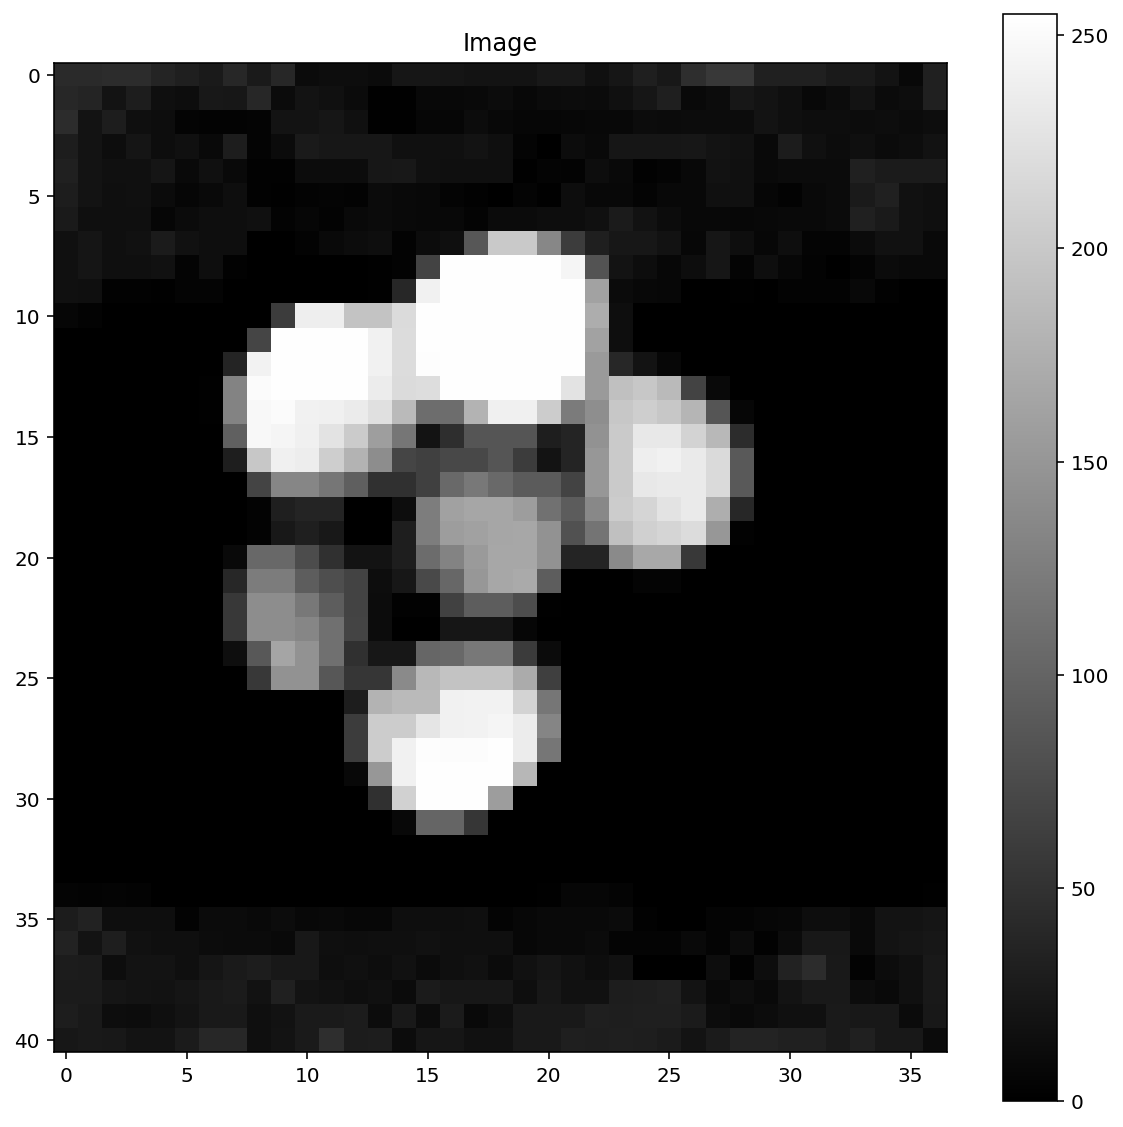

In [38]:
denoised = rank.median(img,disk(1))
ip.showImage(denoised, figsize=(10,10))

In [39]:
markers = rank.gradient(denoised,disk(2)) < 1
markers = ndi.label(markers)[0]

gradient = rank.gradient(img2,disk(2))

labels = watershed(gradient, markers)
ip.showImage(markers, vmax = np.max(markers), title = 'markers')
ip.showImage(gradient,vmax = np.max(gradient))
ip.showImage(labels, vmax = np.max(labels))

ValueError: operands could not be broadcast together with shapes (41,37) (42,35) 